In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("Placement_Data_Full_Class.csv")

In [3]:
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1.0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2.0,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3.0,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4.0,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5.0,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,211.0,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
213,212.0,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
214,213.0,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
215,214.0,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [4]:
#is a great way to get a quick count of null values in each column of a DataFrame.
dataset.isnull().sum()

sl_no              2
gender             2
ssc_p              2
ssc_b              2
hsc_p              2
hsc_b              2
hsc_s              2
degree_p           2
degree_t           2
workex             2
etest_p            2
specialisation     2
mba_p              2
status             2
salary            69
dtype: int64

#1)Replace the NaN values with correct value. And justify why you have chosen the same.

In [5]:
#Rmove extra empyt rows
#In this code:
#- axis=1 specifies that we're working with columns
#- axis=0 specifies that we're working with rows
#- how='all' means that only columns or rows with all missing values (i.e., empty columns or rows) will be removed

#- axis=1 என்பது நெடுவரிசைகளுடன் நாங்கள் வேலை செய்கிறோம் என்பதைக் குறிப்பிடுகிறது
#- axis=0 என்பது நாம் வரிசைகளுடன் வேலை செய்கிறோம் என்பதைக் குறிப்பிடுகிறது
#- எப்படி='அனைத்து' என்றால், அனைத்து விடுபட்ட மதிப்புகள் 
#(அதாவது வெற்று நெடுவரிசைகள் அல்லது வரிசைகள்) கொண்ட நெடுவரிசைகள் அல்லது வரிசைகள் மட்டுமே அகற்றப்படும்.

dataset=dataset.dropna(axis=0, how='all').dropna(axis=1, how='all')
dataset.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [6]:
#df: the original DataFrame
#df: அசல் DataFrame
#fillna(): the method to replace NaN values
#fillna(): NaN மதிப்புகளை மாற்றுவதற்கான முறை
#inplace=True, you're telling pandas to modify the original DataFrame df directly, rather than returning a new DataFrame with the replaced values.
#inplace=True ஐ அமைப்பதன் மூலம், மாற்றப்பட்ட மதிப்புகளுடன் புதிய DataFrame ஐத் திருப்பித் தராமல், அசல் DataFrame df ஐ நேரடியாக மாற்றுமாறு பாண்டாக்களிடம் கூறுகிறீர்கள்.
dataset["salary"].fillna(0,inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_12828\3941721443.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["salary"].fillna(0,inplace=True)


In [7]:
dataset.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

2)How many of them are not placed?

In [8]:
dataset['status']

0          Placed
1          Placed
2          Placed
3      Not Placed
4          Placed
          ...    
212        Placed
213        Placed
214        Placed
215        Placed
216    Not Placed
Name: status, Length: 215, dtype: object

In [9]:
#Count the number of rows where "status" is not "Placed"
Not_Placed_count=(dataset['status']=='Not Placed').sum()
print(Not_Placed_count)

67


#3)Find the reason for non placement from the dataset?

#4)What kind of relation between salary and mba_p

In [10]:
dataset.corr(numeric_only=True)

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.002543
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.538090
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.452569
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,0.408371
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.186988
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.139823
salary,0.002543,0.538090,0.452569,0.408371,0.186988,0.139823,1.000000


In [11]:
dataset['mba_p'].corr(dataset['salary'])

np.float64(0.13982273892615557)

#5)Which specialization is getting minimum salary?

In [12]:
dataset[dataset['specialisation']=="Mkt&HR"]["salary"]

0      270000.0
3           0.0
12     260000.0
14          0.0
16          0.0
         ...   
204    240000.0
205    260000.0
210         0.0
215    204000.0
216         0.0
Name: salary, Length: 95, dtype: float64

In [13]:
dataset[dataset['specialisation']=="Mkt&Fin"]["salary"]

1      200000.0
2      250000.0
4      425000.0
5           0.0
6           0.0
         ...   
209    300000.0
211    216000.0
212    400000.0
213    275000.0
214    295000.0
Name: salary, Length: 120, dtype: float64

In [14]:
dataset[['salary']]

,salary
0,270000.0
1,200000.0
2,250000.0
3,0.0
4,425000.0
...,...
212,400000.0
213,275000.0
214,295000.0
215,204000.0


In [15]:
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1.0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2.0,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3.0,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4.0,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5.0,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,211.0,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
213,212.0,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
214,213.0,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
215,214.0,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


 #6)How many of them getting above 500000 salary?

In [16]:
amount=dataset['salary']

In [17]:
amount

0      270000.0
1      200000.0
2      250000.0
3           0.0
4      425000.0
         ...   
212    400000.0
213    275000.0
214    295000.0
215    204000.0
216         0.0
Name: salary, Length: 215, dtype: float64

In [18]:
above_500K=[x for x in amount if x > 500000 ]

In [19]:
print(above_500K)

[940000.0, 690000.0, 650000.0]


#7)Test the Analysis of Variance between etest_p and mba_p at signifance level 5%.(Make decision using Hypothesis Testing)

In [20]:
#statement: test whether ssc_p of female and hsc_p male is same?
#null hypotesis=there is no similarity between 10th pass mark of male 12th pass mark of male

In [21]:
dataset['etest_p']

0      55.0
1      86.5
2      75.0
3      66.0
4      96.8
       ... 
212    91.0
213    74.0
214    59.0
215    70.0
216    89.0
Name: etest_p, Length: 215, dtype: float64

In [22]:
dataset['mba_p']

0      58.80
1      66.28
2      57.80
3      59.43
4      55.50
       ...  
212    74.49
213    53.62
214    69.72
215    60.23
216    60.22
Name: mba_p, Length: 215, dtype: float64

In [23]:
from scipy.stats import ttest_ind
dataset=dataset.dropna()
MALE = dataset[dataset['gender']=='M']['ssc_p']
MALE1 = dataset[dataset['gender']=='M']['hsc_p']
ttest_ind(MALE,MALE1)

TtestResult(statistic=np.float64(0.462536606114424), pvalue=np.float64(0.6440609938866582), df=np.float64(276.0))

#9)Convert the normal distribution to standard normal distribution for salary column

C:\Users\user\AppData\Local\Temp\ipykernel_12828\1787962733.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["salary"])


<Axes: xlabel='salary', ylabel='Density'>

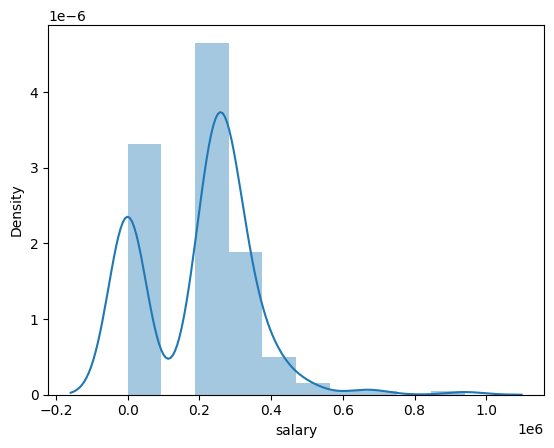

In [24]:
import seaborn as sns
sns.distplot(dataset["salary"])

In [25]:
def stdNBgraph(dataset):
    import seaborn as sns
    mean=dataset.mean()
    std=dataset.std()

    values=[i for i in dataset]

    z_score=[((j-mean)/std) for j in values]

    sns.distplot(z_score,kde=True)

    sum(z_score)/len(z_score)    

C:\Users\user\AppData\Local\Temp\ipykernel_12828\1573502603.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(z_score,kde=True)


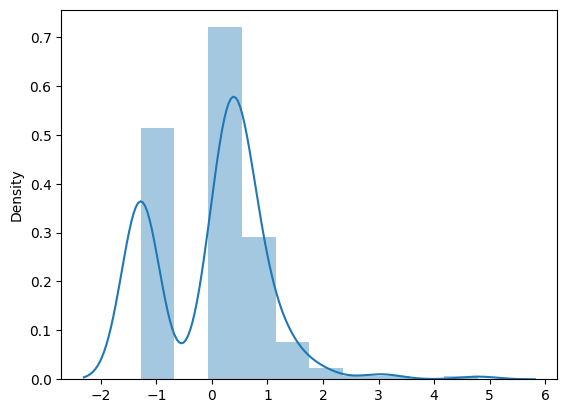

In [26]:
stdNBgraph(dataset['salary'])